## Testing the BPASS isochrone at 10^9.2 years age. Using Duchene & Krauss (2013) multiplicity)
In this BPASS isochrone and cluster plot, I go over the BPASS isochrone for 9.2 billion years age, 0.1 times solar metallicity, AKs=0.5, and distance of 2000 parsecs from Earth. From the isochrone and cluster, we discuss several plots such as the log_g frequency distribution of the isochrone, the color magnitude diagram (B-V vs pseudo-M_V), and the mass luminosity relationship of the cluster. **Note that I say pseudo-M_V as it is the absoulte magnitude but NOT accounting for extinction**

Formula for pseudo M_V
pseudo-M_V = V - 5$log_{10}$(distance to cluster/(10 pc))

Other notes:

I have chosen dist to cluster = 2000 pc to further distinguish this notebook from the other 10^9.2 year old isochrone Notebook.
**As the title indicates, I have decided to use unresolved multiplicity in my BPASS and MISTv.1 clusters.**

In [27]:
import spisea
from spisea import evolution, synthetic
import math
# Check if the evolution class works fine
import time
t1=time.time()
bps=evolution.BPASS()
iso1=synthetic.Isochrone_Binary(9.2, 0.5, 2000,math.log10(0.1), mass_sampling=1)

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/u/ryotainagaki/Desktop/PyPopStar/spisea/evolution.py:1792: RuntimeWarning: overflow encountered in power
  (1 / cs.au) * un.m)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Changing to logg=5.00 for T= 20715 logg=7.07
Changing to logg=5.00 for T= 24351 logg=5.62
Changing to logg=5.00 for T= 32004 logg=6.49
Changing to logg=5.00 for T= 39903 logg=7.00
Changing to logg=5.00 for T= 24344 logg=7.21
Changing to logg=5.00 for T= 21592 logg=5.57
Changing to logg=5.00 for T= 23312 logg=7.37
Changing to logg=5.00 for T= 18255 logg=5.15
Changing to logg=5.00 for T= 24030 logg=7.31
Changing to logg=5.00 for T= 31527 logg=6.41
Changing to logg=5.00 for T= 17441 logg=5.06
Changing to T= 50000 for T= 67073 logg=5.76
Changing to logg=5.00 for T= 67073 logg=5.76
Changing to logg=5.00 for T= 33534 logg=6.57
Changing to logg=5.00 for T= 39646 logg=6.99
Changing to logg=5.00 for T= 45852 logg=7.73
Changing to logg=5.00 for T= 23534 logg=7.23
Changing to logg=5.00 for T= 30895 logg=6.47
Changing to logg=5.00 for T= 29347 logg=7.82
Changing to logg=5.00 for T= 24339 logg=5.63
Changing to logg=5.00 for T= 22601 logg=7.33
Changing to logg=5.00 for T= 22989 logg=5.52
Changing to

For a sanity check, we can see that the primaries, secondaries, and single stars have phasees of 5 or of 101 or of 110. Note that we will have a phase of 110 in order to indicate a mystery compact remnant that BPASS provides for NEWSECMODS (secondary star models with compact primaries). This is since we haven't added neutron stars or black holes yet. Stars with phase of -99 exist, and those are the secondary stars that have already merged. Secondary stars that have merged with their primaries have designation of phase -99.

In [28]:
import numpy as np
np.all([(x==5 or x==101 or x==110) for x in iso1.primaries['phase']])

False

In [29]:
np.all([(x==5 or x==101 or x==110) for x in iso1.singles['phase']])

True

In [30]:
np.all([(x==5 or x==101 or x==-99 or x==110) for x in iso1.secondaries['phase']])

True

Find the maximum, mean, and median  values of logg (cgs) for primaries and secondaries accounting for NaNs in the columns. (For max we make NaNs the same as - infinity and for median and mean, we do not include them)

In [31]:
np.max(iso1.singles['logg'])

9.294221355125417

In [32]:
np.max(np.nan_to_num(iso1.primaries['logg'], -np.inf))

9.294221355125417

In [33]:
np.max(np.nan_to_num(iso1.secondaries['logg'], -np.inf))

9.294186013434684

Now let's find the mean and median logg values for the single stars, secondary stars, and the primary stars

In [34]:
np.mean(iso1.singles['logg'][np.where(~np.isnan(iso1.singles['logg']))])

6.478614555246956

In [35]:
np.mean(iso1.primaries['logg'][np.where(~np.isnan(iso1.primaries['logg']))])

6.829825080157124

In [36]:
np.mean(iso1.secondaries['logg'][np.where(~np.isnan(iso1.secondaries['logg']))])

5.360931066484793

In [37]:
np.median(iso1.singles['logg'][np.where(~np.isnan(iso1.singles['logg']))])

7.939597169306249

In [38]:
np.median(iso1.primaries['logg'][np.where(~np.isnan(iso1.primaries['logg']))])

8.079390004361564

In [39]:
np.median([x for x in iso1.secondaries['logg'] if np.isfinite(x)])

4.499390136742458

Let's make a histogram of log_g values for each table of the isochrone

Text(0.5, 0, 'logg in cgs')

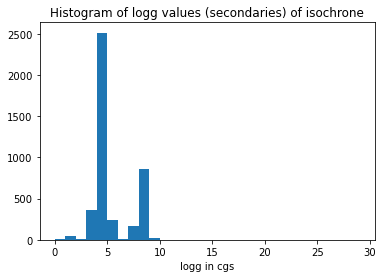

In [40]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values (secondaries) of isochrone")
plt.hist(np.array([x for x in iso1.secondaries['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

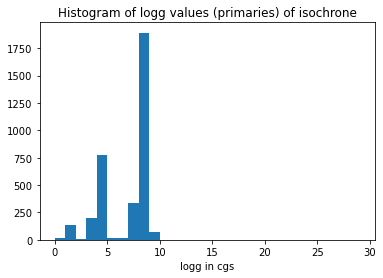

In [41]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values (primaries) of isochrone")
plt.hist(np.array([x for x in iso1.primaries['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

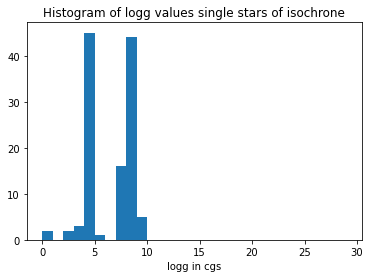

In [42]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values single stars of isochrone")
plt.hist(np.array([x for x in iso1.singles['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

For comparison, let's create a MIST v.1. isochrone  phot using otherwise same parameters.

In [43]:
iso2=synthetic.IsochronePhot(9.2, 0.5, 2000, math.log10(0.1), recomp=True) # New MIST v.1 isochrone for same metallicity

Isochrone generation took 94.047204 s.
Making photometry for isochrone: log(t) = 9.20  AKs = 0.50  dist = 2000
     Starting at:  2021-04-11 01:13:29.829941   Usually takes ~5 minutes
Starting filter: ubv,U   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.105 Msun  T =  3386 K  m_ubv_U = 35.69
M =   0.743 Msun  T =  5692 K  m_ubv_U = 25.88
M =   1.429 Msun  T =  9088 K  m_ubv_U = 21.54
M =   1.488 Msun  T =  5358 K  m_ubv_U = 21.81
M =   1.523 Msun  T =  4066 K  m_ubv_U = 19.78
M =   1.556 Msun  T =  4981 K  m_ubv_U = 20.19
M =   1.559 Msun  T =  4269 K  m_ubv_U = 19.61
M =   1.559 Msun  T =  3883 K  m_ubv_U = 19.88
M =   1.559 Msun  T =  3952 K  m_ubv_U = 19.81
M =   1.559 Msun  T =  3806 K  m_ubv_U = 19.99
M =   1.559 Msun  T =  3654 K  m_ubv_U = 20.24
M =   1.559 Msun  T =  6746 K  m_ubv_U = 14.94
M =   1.559 Msun  T = 75219 K  m_ubv_U = 18.68
M =   1.559 Msun  T = 76344 K  m_ubv_U = 25.65
Starting filter: ubv,B   Elapsed time: 3.83 seconds
Starting synthetic photo

Note: dist/10 pc = 200 for both of our isochrones and clusters

Find the maximum logg of the isochrone and the distribution of logg values

In [44]:
np.max(iso2.points['logg'])

7.938784080569296

(array([519., 146., 185.,  81., 227.,  67.,  21., 128.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <BarContainer object of 29 artists>)

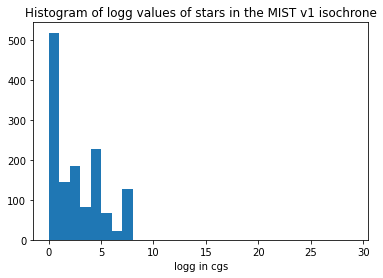

In [45]:
import matplotlib.pyplot as plt
plt.xlabel("logg in cgs")
plt.title("Histogram of logg values of stars in the MIST v1 isochrone")
plt.hist(np.array([x for x in iso2.points['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))

Finding the log_g median and mean for the new isochrone

In [46]:
np.median(iso2.points['logg'])

2.0655075179623505

In [47]:
np.mean(iso2.points['logg'])

2.62397473907989

Now we want to make clusters for both of these models. We want to compare stellar mass distributions of these clusters.

In [48]:
from spisea import imf
from spisea.imf import imf, multiplicity
from spisea import ifmr


In [49]:
clus_1=synthetic.Cluster_w_Binaries(iso1, imf.Kennicutt_1983(multiplicity=multiplicity.MultiplicityResolvedDK()),
                                    200000, ifmr=ifmr.IFMR_Spera15())
clus_2=synthetic.ResolvedCluster(iso2, imf.Kennicutt_1983(multiplicity=multiplicity.MultiplicityResolvedDK()),
                                 200000, ifmr=ifmr.IFMR_Spera15())

99613 single stars had to be deleted


/u/ryotainagaki/Desktop/PyPopStar/spisea/synthetic.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  compMass = np.array([compMass[x] for x in indices])


21 non-single star systems had to be deleted
22511 companions had to be deleted
Found 5264 stars out of mass range
Found 6118 companions out of stellar mass range


Now, I plot the mass distribution of all non-compact remnant stars in both the MIST v.1 and the 

In [50]:
star_systems = clus_1.star_systems
companions = clus_1.companions
prims = [star_systems['mass_current'][x] for x in range(len(star_systems)) if star_systems['phase'][x] == 5]
companions = [companions['mass_current'][x] for x in range(len(companions)) if companions['phase'][x] == 5]

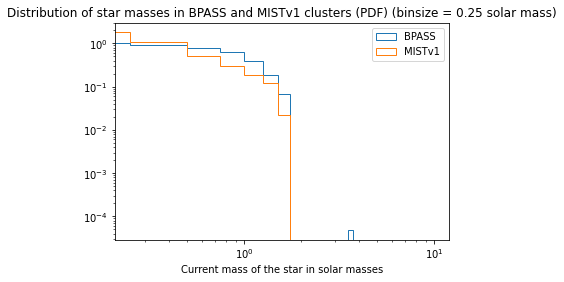

In [51]:
plt.hist(np.array(prims+companions), 40, (0, 10), density=True, histtype='step', label="BPASS")
star_systems2 = clus_2.star_systems
companions2 = clus_2.companions
prims = [star_systems2['mass_current'][x] for x in range(len(star_systems2)) if star_systems2['phase'][x] < 101]
companions = [companions2['mass_current'][x] for x in range(len(companions2)) if companions2['phase'][x] < 101]
plt.hist(np.array(prims+companions), 40, (0, 10), density=True, histtype='step', label="MISTv1")
plt.xlabel("Current mass of the star in solar masses")
plt.title("Distribution of star masses in BPASS and MISTv1 clusters (PDF) (binsize = 0.25 solar mass)")
plt.xscale('log')
plt.yscale('log')
plt.legend()